# Demo 3a: Smart naming compute functions

In [1]:
%matplotlib inline

# Import OceanSpy
import oceanspy as ospy

# Additional packages
import matplotlib.pyplot as plt

# Import the OceanDataset
od = ospy.open_oceandataset.get_started()

Opening [Getting Started with OceanSpy]:
[A small cutout from EGshelfIIseas2km_ASR.].


/home/idies/miniconda3/lib/python3.7/site-packages/dask/array/blockwise.py:204: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


## Syntax

In [2]:
# This syntax returns a dataset with new variables
ds = ospy.compute.potential_density_anomaly(od)

# This syntax returns the old oceandataset with new variables merged
new_od = od.compute.potential_density_anomaly()

Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.


## Gradient

In [3]:
# Compute temperature gradient along whole dimensions
ds = ospy.compute.gradient(od, 'Temp')
print(ds.data_vars)

Computing gradient.
Data variables:
    dTemp_dY     (time, Z, Yp1, X) float64 dask.array<shape=(40, 139, 263, 341), chunksize=(40, 139, 1, 341)>
    dTemp_dX     (time, Z, Y, Xp1) float64 dask.array<shape=(40, 139, 262, 342), chunksize=(40, 139, 262, 1)>
    dTemp_dZ     (time, Zl, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 1, 262, 341)>
    dTemp_dtime  (time_midp, Z, Y, X) float64 dask.array<shape=(39, 139, 262, 341), chunksize=(39, 139, 262, 341)>


Cutting out the oceandataset.
Computing gradient.


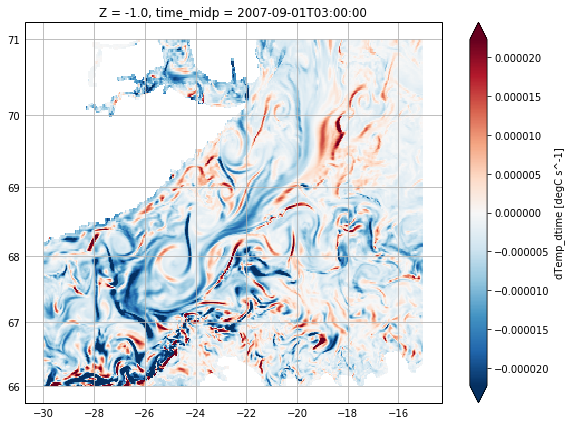

In [4]:
# Compute sst change between two snapshots
sst_od  = od.subsample.cutout(timeRange='2007-09-01T00', ZRange=0, dropAxes=False, varList='Temp')
sst_od  = sst_od.compute.gradient(varNameList='Temp', axesList='time')
fig, ax = plt.subplots(1,1, figsize=(10, 7))
_ = sst_od.plot.horizontal_section(varName='dTemp_dtime', robust=True)

Cutting out the oceandataset.
Computing gradient.


/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/subsample.py:1124: UserWarning: 
Time resampling drops variables on `time_midp` dimension.
Dropped variables: ['time_midp'].
  return cutout(self._od, **kwargs)
/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/plot.py:914: UserWarning: 
Switch projection off. This function currently does not support faceting for projected plots.
  return horizontal_section(self._od, **kwargs)


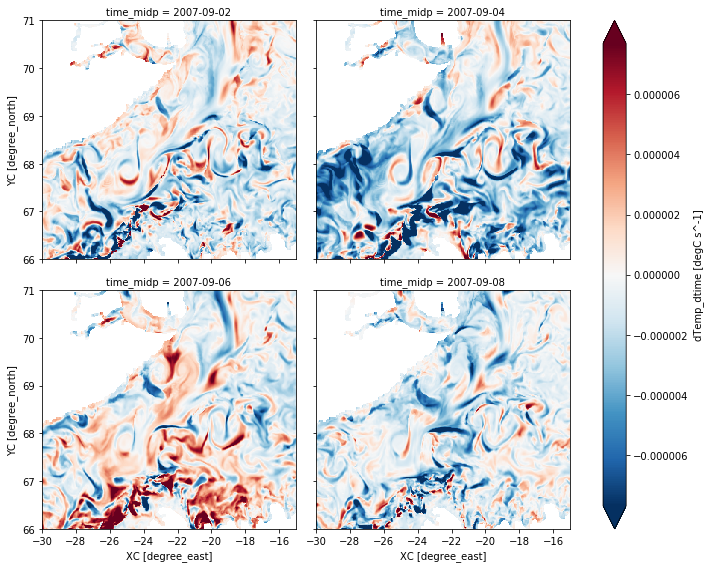

In [5]:
# Compute sst change every 48H
sst_od = od.subsample.cutout(ZRange=0, dropAxes=False, varList='Temp', sampMethod='snapshot', timeFreq='2D')
sst_od = sst_od.compute.gradient(varNameList='Temp', axesList='time')
_ = sst_od.plot.horizontal_section(varName='dTemp_dtime', robust=True, col_wrap=2, figsize=(10,8))

## More functions

In [6]:
print('GRADIENT')
print()
print(ospy.compute.gradient(od, 'Temp').data_vars)
print()

GRADIENT

Computing gradient.
Data variables:
    dTemp_dY     (time, Z, Yp1, X) float64 dask.array<shape=(40, 139, 263, 341), chunksize=(40, 139, 1, 341)>
    dTemp_dX     (time, Z, Y, Xp1) float64 dask.array<shape=(40, 139, 262, 342), chunksize=(40, 139, 262, 1)>
    dTemp_dZ     (time, Zl, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 1, 262, 341)>
    dTemp_dtime  (time_midp, Z, Y, X) float64 dask.array<shape=(39, 139, 262, 341), chunksize=(39, 139, 262, 341)>



In [7]:
print('DIVERGENCE')
print()
print(ospy.compute.divergence(od, iName='U', jName='V', kName='W').data_vars)
print()

DIVERGENCE

Computing divergence.
Computing gradient.
Data variables:
    dU_dX    (time, Z, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 139, 262, 341)>
    dV_dY    (time, Z, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 139, 262, 341)>
    dW_dZ    (time, Z, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 138, 262, 341)>



In [8]:
print('CURL')
print()
print(ospy.compute.curl(od, iName='U', jName='V', kName='W').data_vars)
print()

CURL

Computing curl.
Computing gradient.
Computing gradient.
Computing gradient.
Computing gradient.
Data variables:
    dV_dX-dU_dY  (time, Z, Yp1, Xp1) float64 dask.array<shape=(40, 139, 263, 342), chunksize=(40, 139, 1, 1)>
    dW_dY-dV_dZ  (time, Zl, Yp1, X) float64 dask.array<shape=(40, 139, 263, 341), chunksize=(40, 1, 1, 341)>
    dU_dZ-dW_dX  (time, Zl, Y, Xp1) float64 dask.array<shape=(40, 139, 262, 342), chunksize=(40, 1, 262, 1)>



In [9]:
print('LAPLACIAN')
print()
print(ospy.compute.laplacian(od, varNameList='Temp').data_vars)
print()

LAPLACIAN

Computing laplacian.
Computing gradient.
Computing divergence.
Computing gradient.
Data variables:
    ddTemp_dX_dX  (time, Z, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 139, 262, 1)>
    ddTemp_dY_dY  (time, Z, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 139, 1, 341)>
    ddTemp_dZ_dZ  (time, Z, Y, X) float64 dask.array<shape=(40, 139, 262, 341), chunksize=(40, 1, 262, 341)>



### Weighted means

In [10]:
# Weighted mean of Temperature in the first 100m
od_100m   = od.subsample.cutout(timeRange='2007-09-01', dropAxes='time', ZRange=[0, -100])
ds_w_mean = ospy.compute.weighted_mean(od_100m, varNameList='Temp', axesList=['Z'])

print()
print(ds_w_mean.data_vars)
print()
print(ds_w_mean['weight_Temp'])

Cutting out the oceandataset.
Computing weighted averages.

Data variables:
    w_mean_Temp  (time, Y, X) float64 dask.array<shape=(1, 262, 341), chunksize=(1, 262, 341)>
    weight_Temp  (time, Z, Y, X) float64 dask.array<shape=(1, 13, 262, 341), chunksize=(1, 13, 262, 341)>

<xarray.DataArray 'weight_Temp' (time: 1, Z: 13, Y: 262, X: 341)>
dask.array<shape=(1, 13, 262, 341), dtype=float64, chunksize=(1, 13, 262, 341)>
Coordinates:
  * X        (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y        (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
    XC       (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
    YC       (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
  * time     (time) datetime64[ns] 2007-09-01
  * Z        (Z) float64 -1.0 -3.5 -7.0 -11.5 -17.0 ... -59.5 -71.0 -83.5 -97.0
Attributes:
    long_name:  Weights for space dimensions
    units:      m^1


/home/idies/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


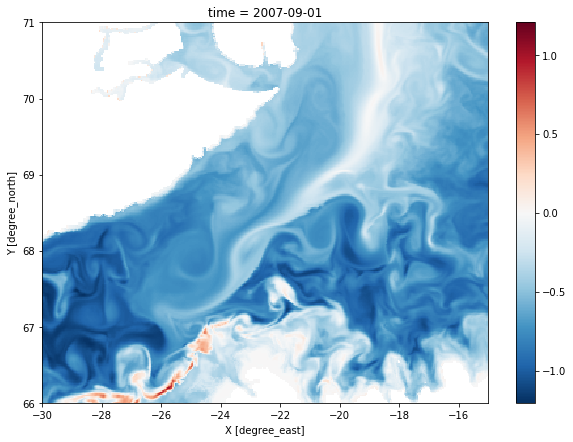

In [11]:
# Difference with a non-weighted mean
Temp_w_mean = ds_w_mean['w_mean_Temp']
Temp_mean   = od_100m.dataset['Temp'].mean('Z')
fig, ax = plt.subplots(1,1, figsize=(10, 7))
_ = (Temp_w_mean-Temp_mean).plot()

In [12]:
# Volume weighted mean
ds_w_mean = ospy.compute.weighted_mean(od_100m, varNameList='Temp', axesList=['X', 'Y', 'Z'])
print('Non-weighted mean temperature: {:.2}°C'.format(od_100m.dataset['Temp'].mean().values))
print('Weighted mean temperature    : {:.2}°C'.format(float(ds_w_mean['w_mean_Temp'].values)))
print()
print(ds_w_mean['weight_Temp'])

Computing weighted averages.
Non-weighted mean temperature: 2.7°C
Weighted mean temperature    : 2.2°C

<xarray.DataArray 'weight_Temp' (time: 1, Z: 13, Y: 262, X: 341)>
dask.array<shape=(1, 13, 262, 341), dtype=float64, chunksize=(1, 13, 262, 341)>
Coordinates:
  * time     (time) datetime64[ns] 2007-09-01
  * Z        (Z) float64 -1.0 -3.5 -7.0 -11.5 -17.0 ... -59.5 -71.0 -83.5 -97.0
  * X        (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y        (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
    XC       (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
    YC       (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
Attributes:
    long_name:  Weights for space dimensions
    units:      m^3


In [13]:
print('INTEGRAL')
print()
print(ospy.compute.integral(od, varNameList='Temp', axesList=['Z']).data_vars)
print()

INTEGRAL

Computing integrals.
Data variables:
    I(Temp)dZ  (time, Y, X) float64 dask.array<shape=(40, 262, 341), chunksize=(40, 262, 341)>



To do:

* Add more integration options

* Add more weighted statistics

* Fully implement integral in weighted function
